In [1]:
%pylab inline
from scipy import signal
import matplotlib
matplotlib.rcParams['font.size'] = 16
sys.path.append("../codes/")
from CondUtils import ColeColePelton, transFilt

Populating the interactive namespace from numpy and matplotlib



Bad key "axes.spines.right" on line 210 in
/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.flierprops.linewidth" on line 321 in
/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "contour.corner_mask" on line 306 in
/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.vertical" on line 339 in
/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/sty

In [2]:
def ColeColePelton(f, sigmaInf, eta, tau, c, option):
    """
    
        .. math::
            \sigma(\omega) = \sigma_{\infty}\Big(1-\frac{\eta}{1+(1-\eta)(\imath\omega\tau)^c} \Big)
            
    """
    w = 2*np.pi*f
    sigma = sigmaInf*(1 - eta/(1 + (1-eta)*(1j*w*tau)**c))
    if option=="sigma":
        return sigma
    elif option=="resis":
        return 1./(sigma)
    else:
        raise Exception("Put only sigma or resis")

In [3]:
def halfcutycurrents(npow, nrepeat):
    ntime = 2**npow
    tlength = 2**(npow-2)
    currents = np.zeros(ntime/2)
    currents[:tlength] = 1.
    currents[tlength:] = 0.  
    currents = np.r_[currents, -currents]
    ntime = 2**npow*nrepeat
    t = np.arange(ntime, dtype=float)/(ntime-1) 
    out = np.repeat(currents.reshape([1,-1]), nrepeat, axis=0).flatten()
    return t, out

In [25]:
def vizcurrents(t, currents, tag="AC currents"):    
    figsize(6,2)
    vmin, vmax = -1.5, 1.5
    tmin, tmax = -0.1, 1.    
    plt.plot(t, currents, 'r', lw=2)
    plt.plot(np.r_[tmin, tmax], np.r_[0., 0.], 'k-', lw=1)
    plt.plot(np.r_[0., 0.], np.r_[vmin, vmax], 'k-', lw=1)
    plt.ylim(vmin, vmax)
    plt.xlim(tmin, tmax)
    plt.xlabel("Time")
    plt.ylabel("I (A)", color="r")
    plt.text(0.5, 1.15, tag)
    plt.text(-0.05, -0.4, "0")
    plt.xticks([])
    plt.yticks([])    
    plt.show()

In [26]:
def vizvoltages(t, currents, tag="Measured voltages"):    
    figsize(6,2)
    vmin, vmax = -1.5, 1.5
    tmin, tmax = -0.1, 1.    
    plt.plot(t, currents, 'b', lw=2)
    plt.plot(np.r_[tmin, tmax], np.r_[0., 0.], 'k-', lw=1)
    plt.plot(np.r_[0., 0.], np.r_[vmin, vmax], 'k-', lw=1)
#     plt.ylim(vmin, vmax)
    plt.xlim(tmin, tmax)
    plt.xlabel("Time")
    plt.ylabel("Voltage (V)", color="b")
    plt.text(0.5, 1.15, tag)
    plt.text(-0.05, -0.4, "0")
    plt.xticks([])
    plt.yticks([])    
    plt.show()

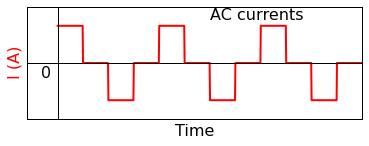

In [27]:
t, currents = halfcutycurrents(8, 3)
vizcurrents(t, currents)

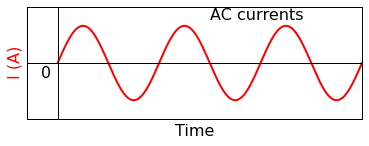

In [28]:
currents = np.sin(2*np.pi/(1./3)*t)
vizcurrents(t, currents)

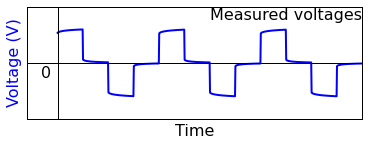

In [29]:
t, currents = halfcutycurrents(8, 3)
eta = 0.2
sigmaInf, tau, c, option = 1./(1.-eta), 0.1, 0.5, "resis"
fcn = lambda f: ColeColePelton(f, sigmaInf, eta, tau, c, option)
res = transFilt(fcn, np.r_[t[1], t[1:]], option="impulse")
voltage = np.convolve(currents, res)[:t.size]*(t[1]-t[0]) + currents/sigmaInf
vizvoltages(t, voltage)

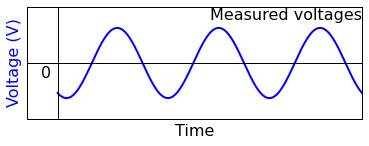

In [30]:
res = fcn(1./3)
amp, phase = abs(res), np.angle(res, deg=True)
currents = np.sin(2*np.pi/(1./3)*t)
voltage = amp*np.sin(2*np.pi/(1./3)*t+phase)
vizvoltages(t, voltage)